In [1]:
import pandas as pd
import numpy as np
import keras

from sklearn.model_selection import train_test_split
#i#mport imblearn
#from imblearn.over_sampling import SMOTE
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Input
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import keras_tuner as k
from hyperopt import fmin, tpe, Trials
from keras import Sequential
from keras.layers import Dense
#pip install keras-tuner --upgrade
#pip install hyperopt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from mlxtend.plotting  import plot_decision_regions 

Using TensorFlow backend


In [2]:
 df=pd.read_csv("9.random.csv",header=None)

In [3]:
df.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [5]:
df.shape

(400, 3)

In [6]:
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
x=df.iloc[0:,:2]

In [9]:
y=df.iloc[0:,2]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [11]:
x_train.value_counts().sum()

360

In [12]:
y_train.value_counts()

0.0    184
1.0    176
Name: 2, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

In [14]:
trials = Trials()

In [15]:
from keras.regularizers import L1,L2,L1L2

In [66]:
def modellss(hp):
    model=Sequential()
    model.add(Input(shape=(2,)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=5,max_value=25),activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),kernel_initializer="he_normal"))

                    
                
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [67]:
tuner=k.RandomSearch(modellss,objective="val_accuracy",max_trials=25,directory="C:\\Users\\admin\\main\\folder9",project_name="f4")

In [68]:
tuner.search(x_trainp,y_train,epochs=100,validation_data=(x_test,y_test))

Trial 25 Complete [00h 00m 15s]
val_accuracy: 0.675000011920929

Best val_accuracy So Far: 0.75
Total elapsed time: 00h 04m 54s


In [69]:
tuner.results_summary()


Results summary
Results in C:\Users\admin\main\folder9\f4
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 11 summary
Hyperparameters:
hiddenlayers: 5
neurons0: 16
neurons1: 10
neurons2: 9
neurons3: 18
neurons4: 19
neurons5: 18
neurons6: 9
neurons7: 5
neurons8: 12
neurons9: 20
Score: 0.75

Trial 13 summary
Hyperparameters:
hiddenlayers: 6
neurons0: 14
neurons1: 23
neurons2: 15
neurons3: 14
neurons4: 21
neurons5: 12
neurons6: 8
neurons7: 17
neurons8: 13
neurons9: 24
Score: 0.75

Trial 04 summary
Hyperparameters:
hiddenlayers: 5
neurons0: 17
neurons1: 23
neurons2: 5
neurons3: 20
neurons4: 12
neurons5: 16
neurons6: 6
neurons7: 10
neurons8: 20
neurons9: 22
Score: 0.7250000238418579

Trial 23 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 24
neurons1: 23
neurons2: 24
neurons3: 16
neurons4: 19
neurons5: 20
neurons6: 10
neurons7: 16
neurons8: 14
neurons9: 8
Score: 0.7250000238418579

Trial 01 summary
Hyperparameters:
hiddenlayers: 5
neurons0: 25
neurons1: 8
ne

In [70]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 5,
 'neurons0': 16,
 'neurons1': 10,
 'neurons2': 9,
 'neurons3': 18,
 'neurons4': 19,
 'neurons5': 18,
 'neurons6': 9,
 'neurons7': 5,
 'neurons8': 12,
 'neurons9': 20}

In [71]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [72]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
 dense_3 (Dense)             (None, 18)                180       
                                                                 
 dense_4 (Dense)             (None, 19)                361       
                                                                 
 dense_5 (Dense)             (None, 1)                 20        
                                                                 
Total params: 878 (3.43 KB)
Trainable params: 878 (3.43 

In [73]:
history=fmodel.fit(x_trainp,y_train,batch_size=10,epochs=100,validation_split=0.1)

Epoch 1/100
33/33 [==============================] - 2s 10ms/step - loss: 0.8126 - accuracy: 0.5494 - val_loss: 0.8431 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.8062 - accuracy: 0.5247 - val_loss: 0.8416 - val_accuracy: 0.4722
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.8007 - accuracy: 0.5494 - val_loss: 0.8418 - val_accuracy: 0.4722
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 0.8002 - accuracy: 0.5525 - val_loss: 0.8350 - val_accuracy: 0.4167
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7907 - accuracy: 0.5617 - val_loss: 0.8334 - val_accuracy: 0.3611
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7868 - accuracy: 0.5741 - val_loss: 0.8329 - val_accuracy: 0.4444
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7845 - accuracy: 0.5864 - val_loss: 0.8343 - val_accuracy: 0.4722
Epoch 8/100


Epoch 59/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7320 - accuracy: 0.6080 - val_loss: 0.8305 - val_accuracy: 0.4167
Epoch 60/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7283 - accuracy: 0.6080 - val_loss: 0.8218 - val_accuracy: 0.3611
Epoch 61/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7320 - accuracy: 0.5957 - val_loss: 0.8325 - val_accuracy: 0.3611
Epoch 62/100
33/33 [==============================] - 0s 3ms/step - loss: 0.7368 - accuracy: 0.5556 - val_loss: 0.8199 - val_accuracy: 0.3333
Epoch 63/100
33/33 [==============================] - 0s 4ms/step - loss: 0.7288 - accuracy: 0.5833 - val_loss: 0.8246 - val_accuracy: 0.3889
Epoch 64/100
33/33 [==============================] - 0s 3ms/step - loss: 0.7274 - accuracy: 0.5957 - val_loss: 0.8181 - val_accuracy: 0.3611
Epoch 65/100
33/33 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.5833 - val_loss: 0.8230 - val_accuracy: 0.3611
Epoch 

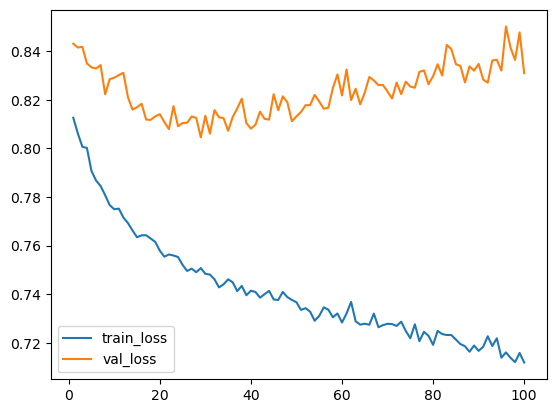

In [74]:
plt.plot(range(1,101),history.history["loss"],label="train_loss")
plt.plot(range(1,101),history.history["val_loss"],label="val_loss")
plt.legend()

In [75]:
history.history['val_loss']

[0.8431157469749451,
 0.8415531516075134,
 0.8418006896972656,
 0.8350013494491577,
 0.8333761692047119,
 0.8329136371612549,
 0.8343055248260498,
 0.8222848773002625,
 0.82851243019104,
 0.8291352391242981,
 0.8301980495452881,
 0.8311305642127991,
 0.8211072087287903,
 0.8159892559051514,
 0.8169591426849365,
 0.8183806538581848,
 0.8118746876716614,
 0.8117576241493225,
 0.813214123249054,
 0.8141052722930908,
 0.8108252286911011,
 0.8079403042793274,
 0.8174191117286682,
 0.8091411590576172,
 0.810451865196228,
 0.8105751872062683,
 0.8131835460662842,
 0.8125308156013489,
 0.8045681715011597,
 0.8134338855743408,
 0.8060733675956726,
 0.8157684803009033,
 0.8128377795219421,
 0.8124411702156067,
 0.8072593212127686,
 0.8128955960273743,
 0.8164791464805603,
 0.8204818367958069,
 0.8104648590087891,
 0.8081347942352295,
 0.8097565770149231,
 0.8151167035102844,
 0.8121823072433472,
 0.8118612766265869,
 0.8223460912704468,
 0.8157215714454651,
 0.8214419484138489,
 0.81899434328079

In [76]:
predicted=fmodel.predict(x_test)

2/2 [==============================] - 0s 3ms/step


In [77]:
predicted=np.where(predicted>0.5,1,0)

In [78]:
accuracy_score(y_test,predicted)

0.65

In [79]:
confusion_matrix(y_test,predicted)

array([[ 0, 14],
       [ 0, 26]], dtype=int64)

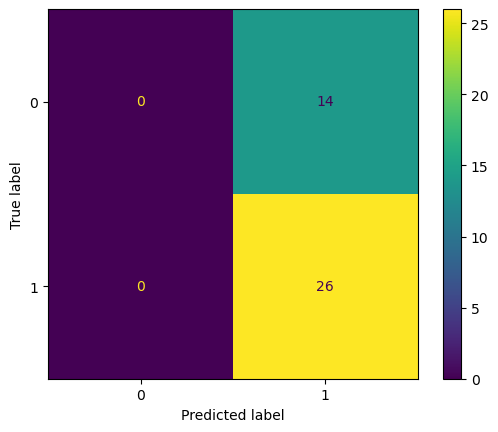

In [80]:

cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()

9600/9600 [==============================] - 18s 2ms/step


<AxesSubplot:>

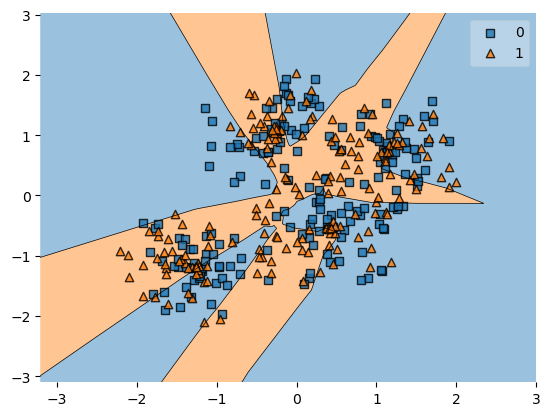

In [81]:
y_train_int = y_train.values.astype(int)
plot_decision_regions(x_trainp, y_train_int, clf=fmodel)

In [51]:
y_test_int = y_test.values.astype(int)

9600/9600 [==============================] - 15s 2ms/step


<AxesSubplot:>

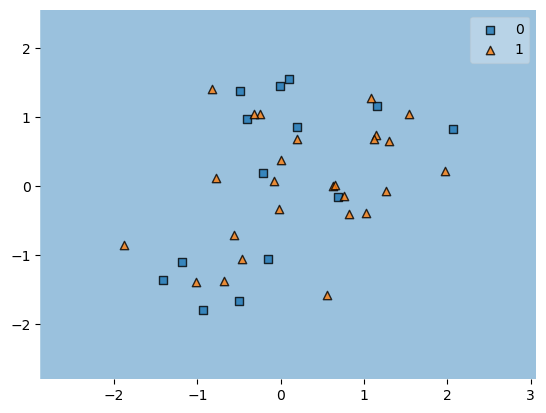

In [52]:

plot_decision_regions(x_testp,y_test_int,clf=fmodel)